In [1]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, GRU, Lambda, Reshape, RNN, LSTMCell

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('/content/drive/MyDrive/산업정보공학특론/중간이후_sincos최종.csv')
df.dropna(subset = ['datetime'], inplace = True)
df

,datetime,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
0,2024-03-01 15:00,1.1,-5.7,-5.7,69.0,-3.9,338.0,18.5,18.5,0.0,...,112.19,1343583.333,869166.6667,0.000000,186993.5833,202769.0000,474583.3333,373750.0000,-0.707107,-7.071068e-01
1,2024-03-01 16:00,2.2,-4.3,-4.3,55.0,-6.1,315.0,22.2,22.2,0.0,...,138.50,1337416.667,831166.6667,0.000000,181352.4167,197162.6667,506250.0000,395166.6667,-0.866025,-5.000000e-01
2,2024-03-01 17:00,2.2,-5.4,-5.4,64.0,-3.9,315.0,22.2,22.2,0.0,...,99.48,1318833.333,807500.0000,0.000000,161981.6667,177954.0833,511250.0000,285833.3333,-0.965926,-2.588190e-01
3,2024-03-01 18:00,2.2,-2.6,-2.6,64.0,-3.9,338.0,16.7,16.7,0.0,...,95.38,1298750.000,789833.3333,0.000000,140727.0833,156318.1667,508666.6667,283166.6667,-1.000000,-1.110000e-11
4,2024-03-01 19:00,1.1,-5.1,-5.1,69.0,-3.9,338.0,16.7,16.7,0.0,...,91.24,1285500.000,785083.3333,0.000000,128531.5000,143984.9167,500416.6667,275833.3333,-0.965926,2.588190e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,...,87.49,1131833.333,489916.6667,0.000000,197024.2500,197313.7500,644500.0000,360250.0000,-0.965926,2.588190e-01
5890,2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,...,0.00,1146166.667,507500.0000,0.000000,211879.5833,212125.0000,639500.0000,356250.0000,-0.866025,5.000000e-01
5891,2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,...,0.00,1123166.667,529333.3333,0.000000,189122.5833,189367.9167,589000.0000,380916.6667,-0.707107,7.071068e-01
5892,2024-11-04 22:00,15.0,14.3,14.3,58.0,7.2,338.0,9.3,9.3,0.0,...,104.21,1142750.000,577083.3333,3939.449167,191854.0000,196087.6667,572000.0000,391750.0000,-0.500000,8.660254e-01


In [4]:
df = df[2154:]
df

,datetime,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
2154,2024-06-01 0:00,18.9,19.6,17.6,82.0,16.1,270.0,11.1,11.1,2.0,...,107.70,1331166.667,606166.6667,98518.483330,81854.316670,194979.8333,725083.3333,387583.3333,-8.390000e-13,1.000000
2155,2024-06-01 1:00,18.9,22.2,17.5,82.0,16.1,293.0,13.0,13.0,6.0,...,145.67,1405750.000,524250.0000,181038.750000,77068.333330,272513.5833,881500.0000,529333.3333,2.588190e-01,0.965926
2156,2024-06-01 2:00,20.0,23.9,18.3,72.0,15.0,293.0,14.8,14.8,9.0,...,0.00,1453000.000,545083.3333,257315.250000,53714.533330,324467.7500,908000.0000,585083.3333,5.000000e-01,0.866025
2157,2024-06-01 3:00,20.0,24.1,18.3,72.0,15.0,293.0,14.8,14.8,11.0,...,-75.58,1421416.667,506000.0000,248305.250000,32281.591670,295421.4167,915500.0000,616916.6667,7.071068e-01,0.707107
2158,2024-06-01 4:00,20.0,24.1,18.3,72.0,15.0,293.0,14.8,14.8,11.0,...,-75.58,1423583.333,548666.6667,274022.166700,9015.070833,296624.2500,874916.6667,595333.3333,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,...,87.49,1131833.333,489916.6667,0.000000,197024.250000,197313.7500,644500.0000,360250.0000,-9.659258e-01,0.258819
5890,2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,...,0.00,1146166.667,507500.0000,0.000000,211879.583300,212125.0000,639500.0000,356250.0000,-8.660254e-01,0.500000
5891,2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,...,0.00,1123166.667,529333.3333,0.000000,189122.583300,189367.9167,589000.0000,380916.6667,-7.071068e-01,0.707107
5892,2024-11-04 22:00,15.0,14.3,14.3,58.0,7.2,338.0,9.3,9.3,0.0,...,104.21,1142750.000,577083.3333,3939.449167,191854.000000,196087.6667,572000.0000,391750.0000,-5.000000e-01,0.866025


In [5]:
df.set_index('datetime', inplace = True)


In [6]:
df

,Bonggae-dong_temp_actual,Bonggae-dong_real_feel_temp_actual,Bonggae-dong_real_feel_temp_shade_actual,Bonggae-dong_rel_hum_actual,Bonggae-dong_dew_point_actual,Bonggae-dong_wind_dir_actual,Bonggae-dong_wind_spd_actual,Bonggae-dong_wind_gust_spd_actual,Bonggae-dong_uv_idx_actual,Bonggae-dong_vis_actual,...,smp_da,supply_power,present_load,power_solar,power_wind,renewable_energy_total,supply_capacity,operation_capacity,day_sin,day_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-01 0:00,18.9,19.6,17.6,82.0,16.1,270.0,11.1,11.1,2.0,16.1,...,107.70,1331166.667,606166.6667,98518.483330,81854.316670,194979.8333,725083.3333,387583.3333,-8.390000e-13,1.000000
2024-06-01 1:00,18.9,22.2,17.5,82.0,16.1,293.0,13.0,13.0,6.0,16.1,...,145.67,1405750.000,524250.0000,181038.750000,77068.333330,272513.5833,881500.0000,529333.3333,2.588190e-01,0.965926
2024-06-01 2:00,20.0,23.9,18.3,72.0,15.0,293.0,14.8,14.8,9.0,16.1,...,0.00,1453000.000,545083.3333,257315.250000,53714.533330,324467.7500,908000.0000,585083.3333,5.000000e-01,0.866025
2024-06-01 3:00,20.0,24.1,18.3,72.0,15.0,293.0,14.8,14.8,11.0,16.1,...,-75.58,1421416.667,506000.0000,248305.250000,32281.591670,295421.4167,915500.0000,616916.6667,7.071068e-01,0.707107
2024-06-01 4:00,20.0,24.1,18.3,72.0,15.0,293.0,14.8,14.8,11.0,16.1,...,-75.58,1423583.333,548666.6667,274022.166700,9015.070833,296624.2500,874916.6667,595333.3333,8.660254e-01,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04 19:00,15.0,13.7,13.7,62.0,7.8,338.0,11.1,11.1,0.0,16.1,...,87.49,1131833.333,489916.6667,0.000000,197024.250000,197313.7500,644500.0000,360250.0000,-9.659258e-01,0.258819
2024-11-04 20:00,15.0,14.2,14.2,62.0,7.8,315.0,9.3,9.3,0.0,16.1,...,0.00,1146166.667,507500.0000,0.000000,211879.583300,212125.0000,639500.0000,356250.0000,-8.660254e-01,0.500000
2024-11-04 21:00,15.0,14.2,14.2,62.0,7.8,338.0,9.3,9.3,0.0,16.1,...,0.00,1123166.667,529333.3333,0.000000,189122.583300,189367.9167,589000.0000,380916.6667,-7.071068e-01,0.707107


In [7]:
# Label
y = df.pop('smp_rc')
y

,smp_rc
datetime,
2024-06-01 0:00,136.1775
2024-06-01 1:00,17.4825
2024-06-01 2:00,-75.5800
2024-06-01 3:00,-75.5800
2024-06-01 4:00,-75.5800
...,...
2024-11-04 19:00,87.5125
2024-11-04 20:00,98.8600
2024-11-04 21:00,103.8175


In [8]:
Test_y = y[-144:]
Test_X = df[-144:]

Train_X = df[:-144]
Train_y = y[:-144]

In [9]:
Test_X.shape, Train_X.shape, Test_y.shape, Train_y.shape

((144, 404), (3596, 404), (144,), (3596,))

In [10]:
from sklearn.preprocessing import RobustScaler

X_scaler = RobustScaler()
X_scaler.fit(Train_X)

y_scaler = RobustScaler()
y_scaler.fit(Train_y.values.reshape(-1, 1))

RobustScaler()

In [11]:
Train_X[Train_X.columns] = X_scaler.transform(Train_X[Train_X.columns])
Test_X[Test_X.columns] = X_scaler.transform(Test_X[Test_X.columns])

Train_y = y_scaler.transform(Train_y.values.reshape(-1, 1))
Test_y = y_scaler.transform(Test_y.values.reshape(-1, 1))

In [12]:
train_df = Train_X
train_df['smp_rc'] = Train_y

test_df = Test_X
test_df['smp_rc'] = Test_y

In [13]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, test_df=test_df,
                 label_columns=None):

        self.train_df = train_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='smp_rc', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)


    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

In [14]:
# 손실 함수 정의
import tensorflow as tf

# 손실 함수 정의
def calculate_measure(y_true, y_pred):
    # 텐서로 변환
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.convert_to_tensor(y_pred)

    # 양수/음수 구분
    positive_index = y_true > 0
    negative_index = y_true <= 0

    # 작은 음수 값 처리
    y_true = tf.where((y_true <= 0) & (y_true > -1), -1.0, y_true)

    # e1과 e2 계산
    n1 = tf.reduce_sum(tf.cast(positive_index, tf.float32)) + 1e-7
    n2 = tf.reduce_sum(tf.cast(negative_index, tf.float32)) + 1e-7
    e1 = tf.reduce_sum(tf.abs(y_true[positive_index] - y_pred[positive_index]) / tf.abs(y_true[positive_index])) / n1
    e2 = tf.reduce_sum(tf.abs(y_true[negative_index] - y_pred[negative_index]) / tf.abs(y_true[negative_index])) / n2

    # 정확도 계산
    TP = tf.reduce_sum(tf.cast((y_pred > 0) & (y_true > 0), tf.float32))
    TN = tf.reduce_sum(tf.cast((y_pred <= 0) & (y_true <= 0), tf.float32))
    FP = tf.reduce_sum(tf.cast((y_pred > 0) & (y_true <= 0), tf.float32))
    FN = tf.reduce_sum(tf.cast((y_pred <= 0) & (y_true > 0), tf.float32))
    Accuracy = (TP + TN) / (TP + TN + FP + FN + 1e-7)

    # 최종 손실 값 계산
    e_F = 0.2 * e1 + 0.8 * e2 - (Accuracy - 0.95)
    return e_F


In [15]:
# def compile_and_fit(model, window, patience=3, max_epochs=50):
#     early_stopping = EarlyStopping(monitor='val_loss',
#                                    patience=patience,
#                                    mode='min')

#     model.compile(loss=calculate_measure,
#                   optimizer=Adam(learning_rate = 0.0005),
#                   metrics=[MeanAbsoluteError()])

#     history = model.fit(window.train,
#                        epochs=max_epochs,
#                        callbacks=[early_stopping])

#     return history

In [16]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['smp_rc'])

In [23]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Lambda
from tensorflow.keras.optimizers import Adam

# 하이퍼파라미터 탐색 공간 정의
param_grid = {
    'units': [32, 64, 128],          # GRU 레이어의 유닛 수
    'dropout': [0.1, 0.2],     # 드롭아웃 비율
    'learning_rate': [0.001, 0.0005]  # 학습률
}

# 하이퍼파라미터 조합 생성
param_combinations = list(itertools.product(*param_grid.values()))
results = []  # 결과 저장
all_results = {}
# 하이퍼파라미터 탐색 및 학습
for params in param_combinations:
    units, dropout, learning_rate = params
    print(f"Training with units={units}, dropout={dropout}, learning_rate={learning_rate}")

    # 모델 생성
    model = Sequential([
        GRU(units, return_sequences=True, dropout=dropout),
        Dense(1, kernel_initializer=tf.initializers.zeros),
        Lambda(lambda x: x[:, -24:, :])  # 마지막 24시간만 출력
    ])

    # 모델 컴파일 및 학습
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mse', metrics=['mae'])

    history = model.fit(
        multi_window.train,
        epochs=10,  # 빠른 확인을 위해 10 epoch만 사용
        verbose=0
    )
    rolling_input  = Test_X[:24].values

        # 롤링 예측 설정
    rolling_predictions = []  # 예측값 저장
    rolling_steps = 24 * 5    # 예측 기간: 5일 (120시간)

    for step in range(rolling_steps):
        # 모델 입력 형태로 변환 (배치 차원 추가)
        rolling_input_reshaped = np.expand_dims(rolling_input, axis=0)  # (1, 24, feature_dim)

        # 예측
        predicted_value = model.predict(rolling_input_reshaped, verbose=0)

        # 예측값 저장
        rolling_predictions.append(predicted_value[0, -1, 0])  # 마지막 1시간의 예측값

        # 실제값으로 다음 입력 데이터 업데이트
        if step + 24 < len(Test_X):  # Test_X에 실제 값이 존재하는 경우
            rolling_input = Test_X[step + 1:step + 25].values  # 1시간씩 앞으로 이동
        else:
            break  # 실제 데이터가 없으면 중단

        # 결과를 NumPy 배열로 변환
    rolling_predictions = np.array(rolling_predictions)

    # 역정규화 (y_scaler 사용)
    rolling_predictions_original = y_scaler.inverse_transform(rolling_predictions.reshape(-1, 1))

    all_results[f"units={units}, dropout={dropout}, lr={learning_rate}"] = rolling_predictions_original.flatten()



Training with units=32, dropout=0.1, learning_rate=0.001
Training with units=32, dropout=0.1, learning_rate=0.0005
Training with units=32, dropout=0.2, learning_rate=0.001
Training with units=32, dropout=0.2, learning_rate=0.0005
Training with units=64, dropout=0.1, learning_rate=0.001
Training with units=64, dropout=0.1, learning_rate=0.0005
Training with units=64, dropout=0.2, learning_rate=0.001
Training with units=64, dropout=0.2, learning_rate=0.0005
Training with units=128, dropout=0.1, learning_rate=0.001
Training with units=128, dropout=0.1, learning_rate=0.0005
Training with units=128, dropout=0.2, learning_rate=0.001
Training with units=128, dropout=0.2, learning_rate=0.0005


In [24]:
import pandas as pd

# 시간 축 생성: 10월 31일 00:00부터 5일간
start_time = pd.Timestamp("2023-10-31 00:00:00")
time_index = pd.date_range(start=start_time, periods=len(rolling_predictions_original), freq="H")


In [25]:
# 실제값 (역정규화된 Test_y에서 10월 31일부터 11월 4일까지)
actual_values = y_scaler.inverse_transform(Test_y[24:144].reshape(-1, 1))  # 120시간 데이터


In [26]:
import pandas as pd

# 시간 축 생성: 10월 31일부터 11월 4일까지 (120시간)
start_time = pd.Timestamp("2023-10-31 00:00:00")
time_index = pd.date_range(start=start_time, periods=120, freq="H")


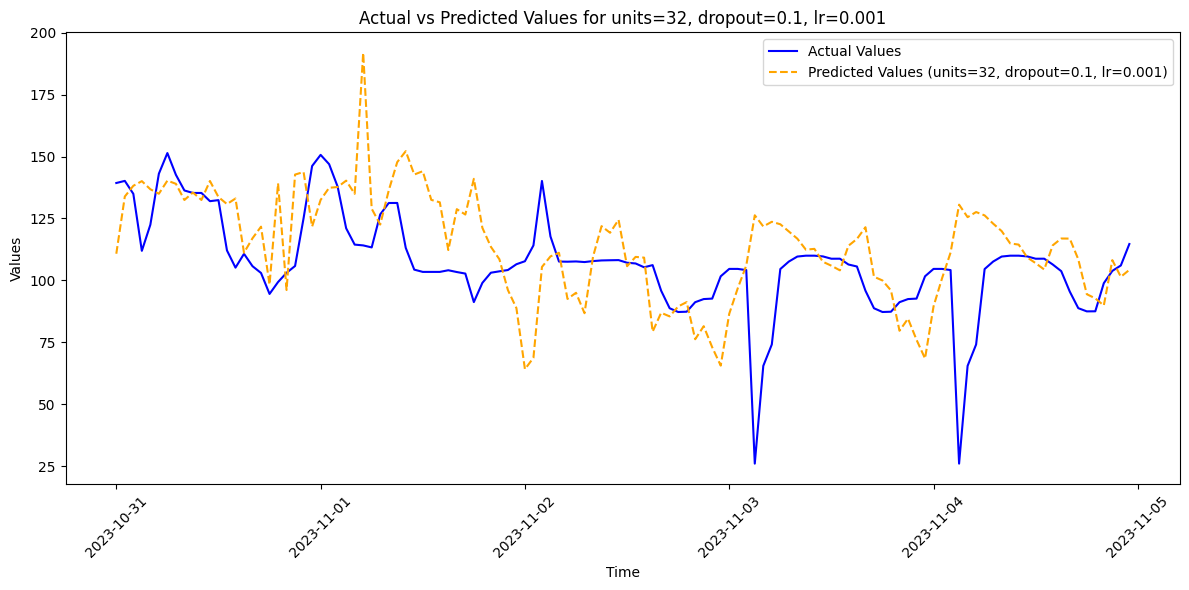

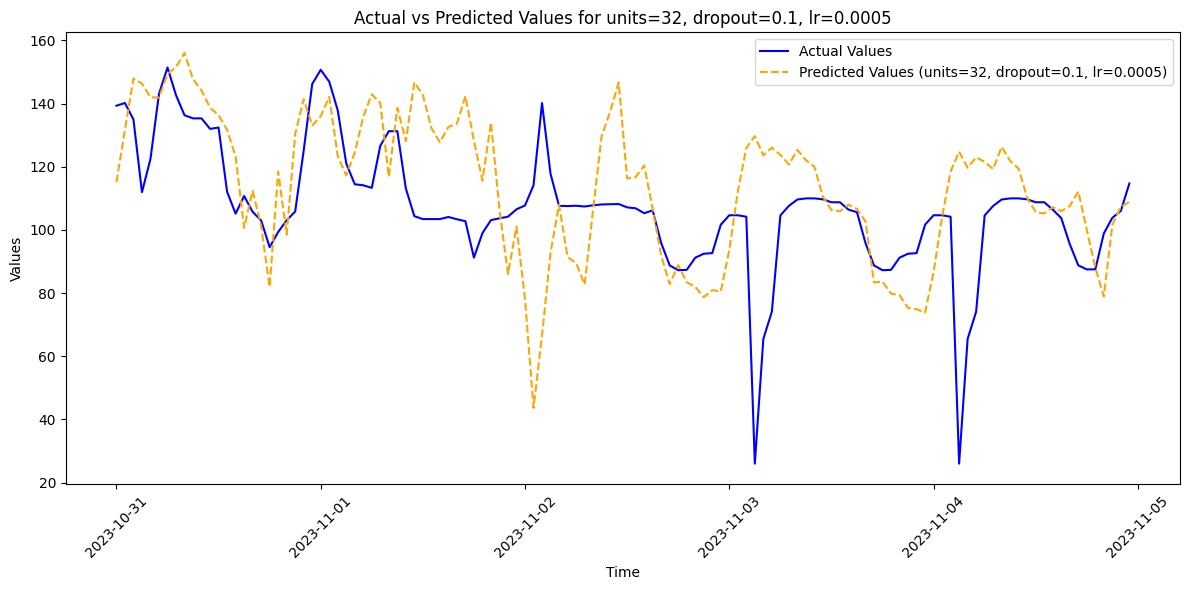

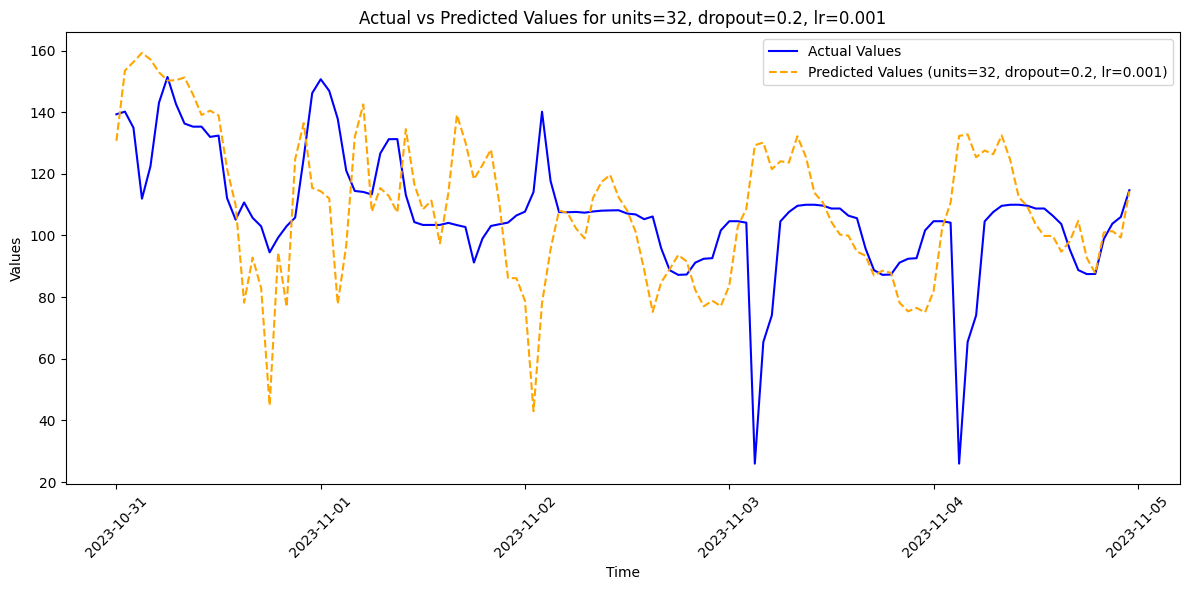

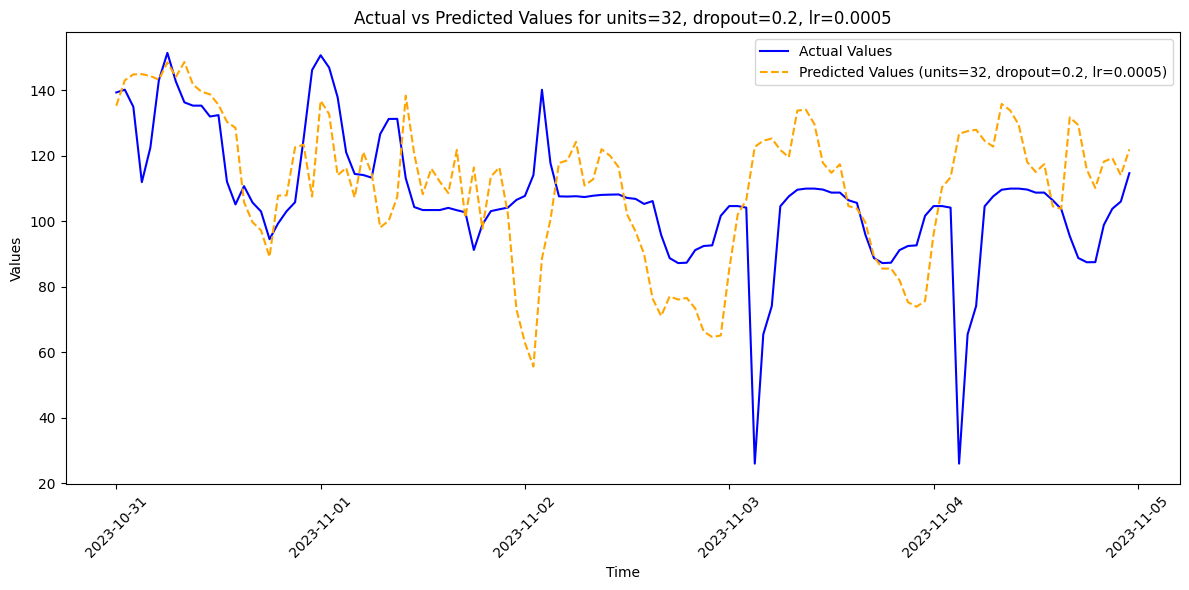

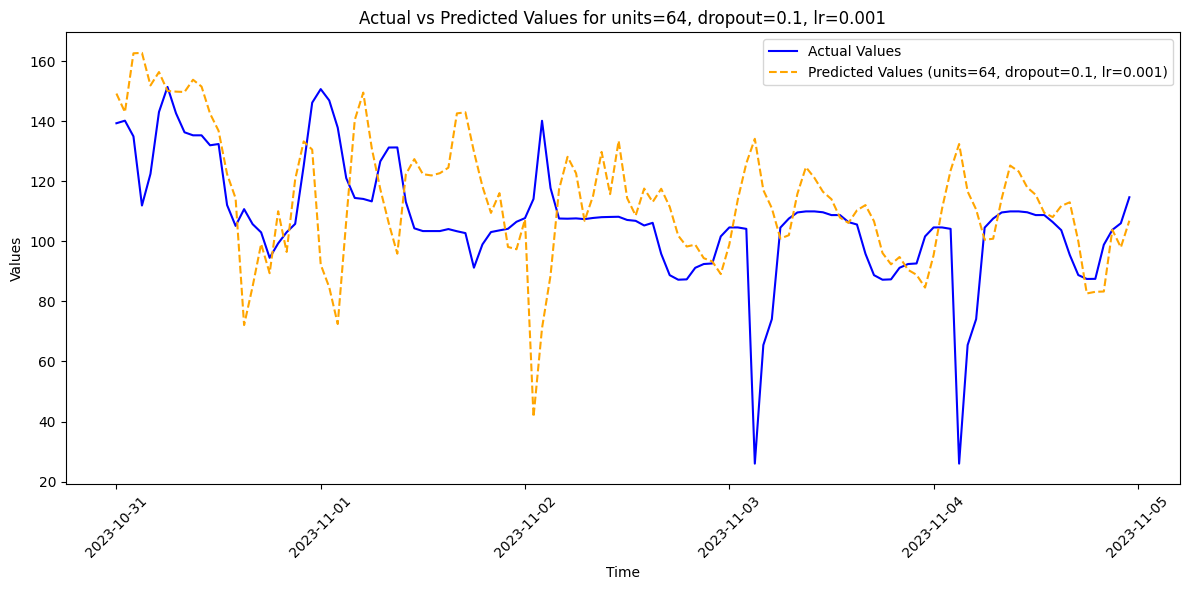

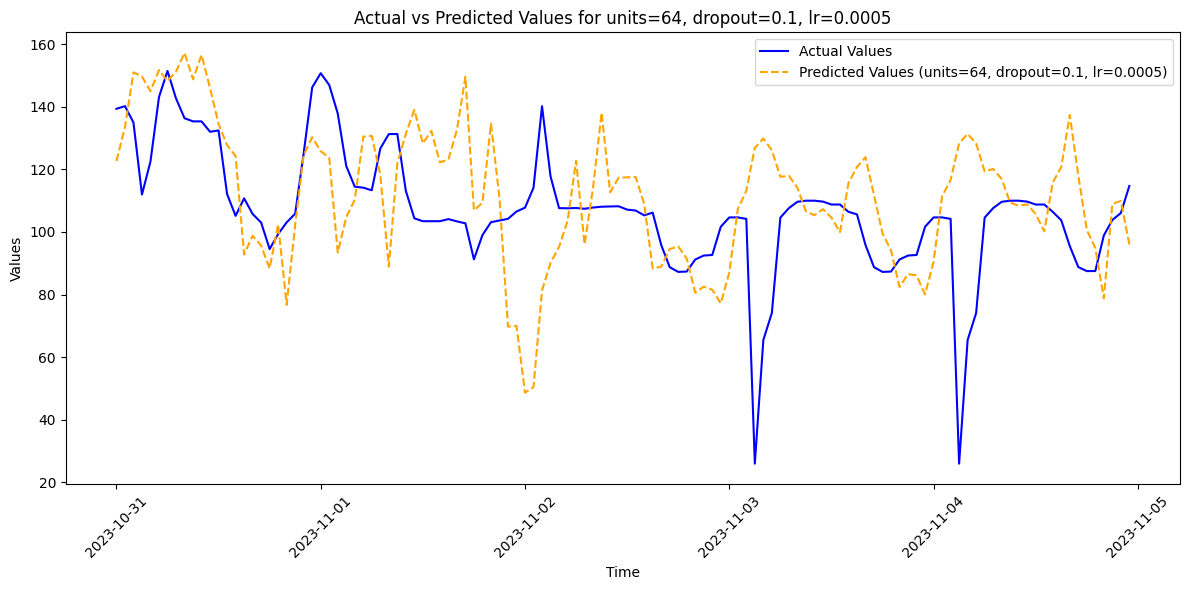

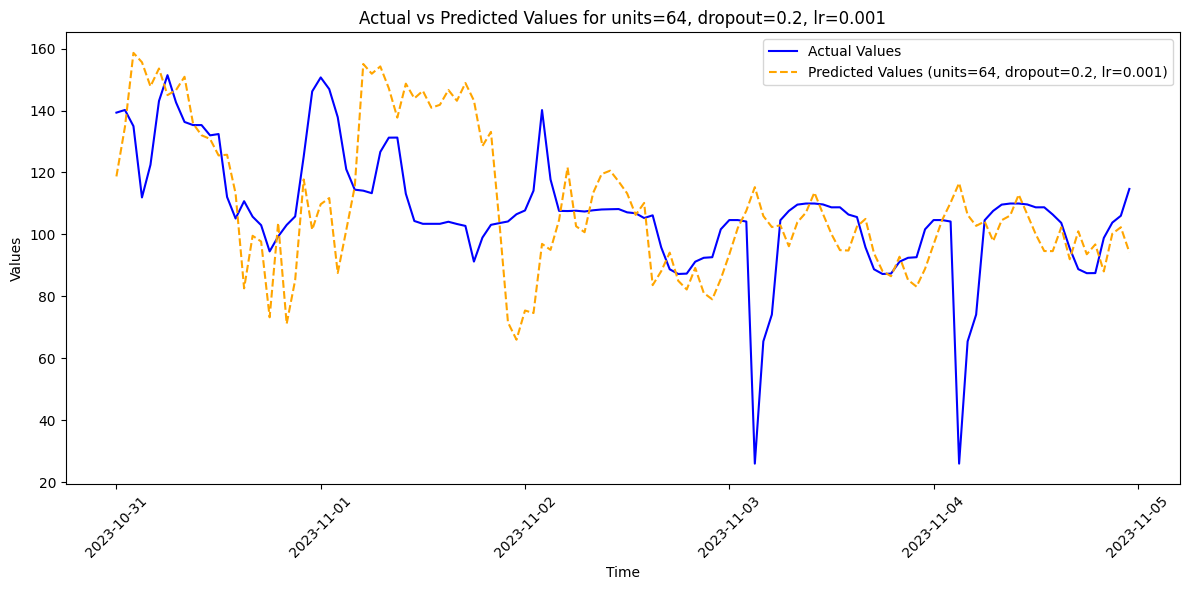

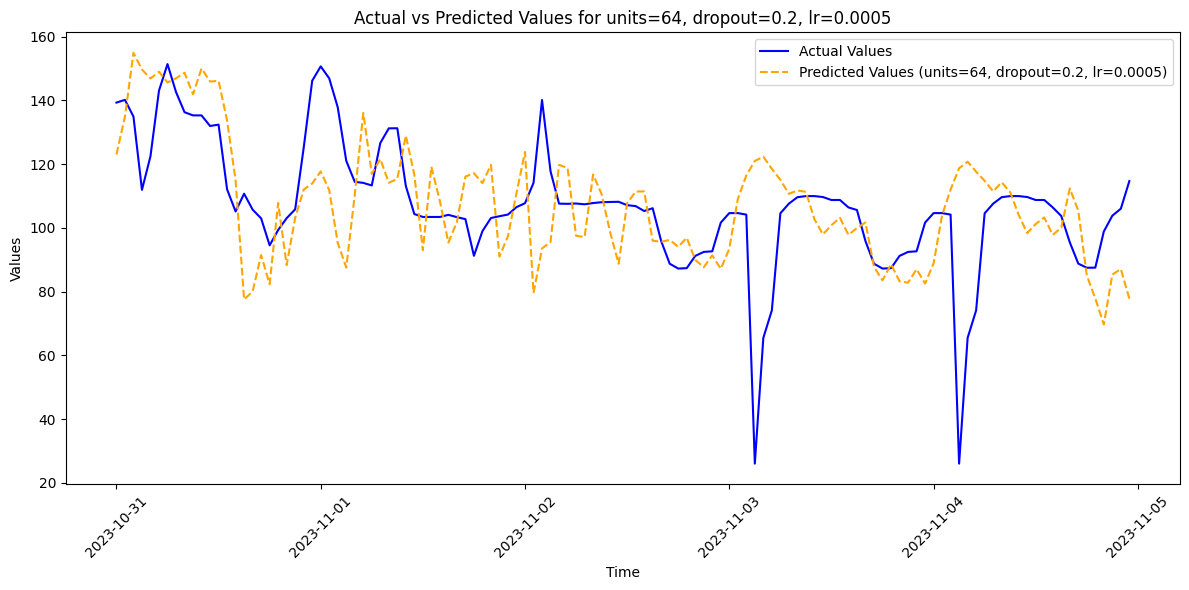

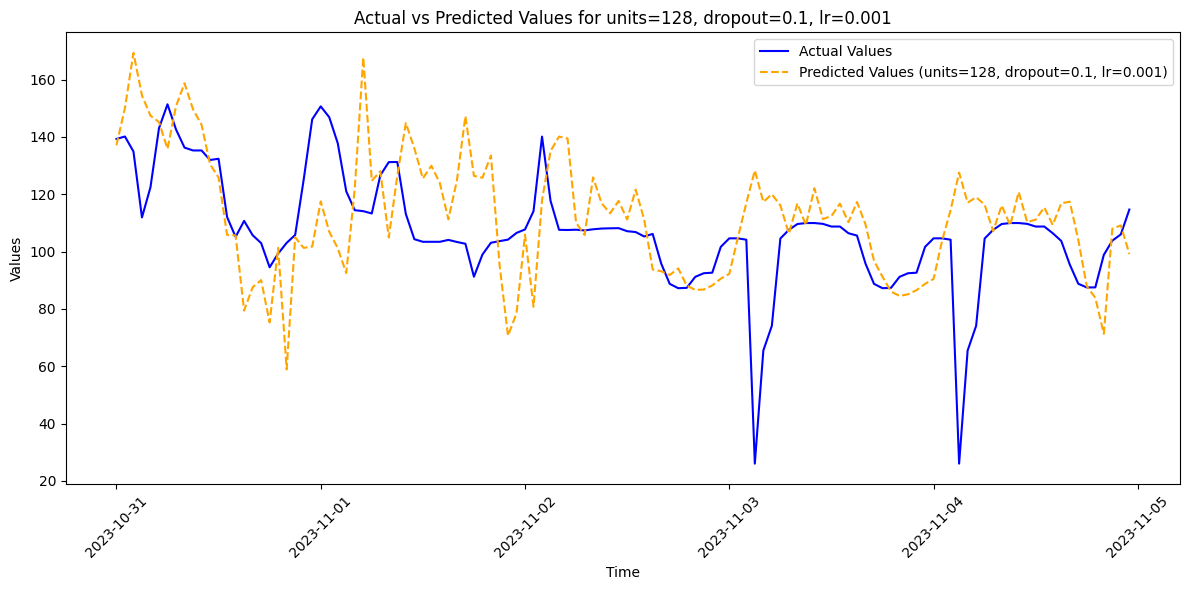

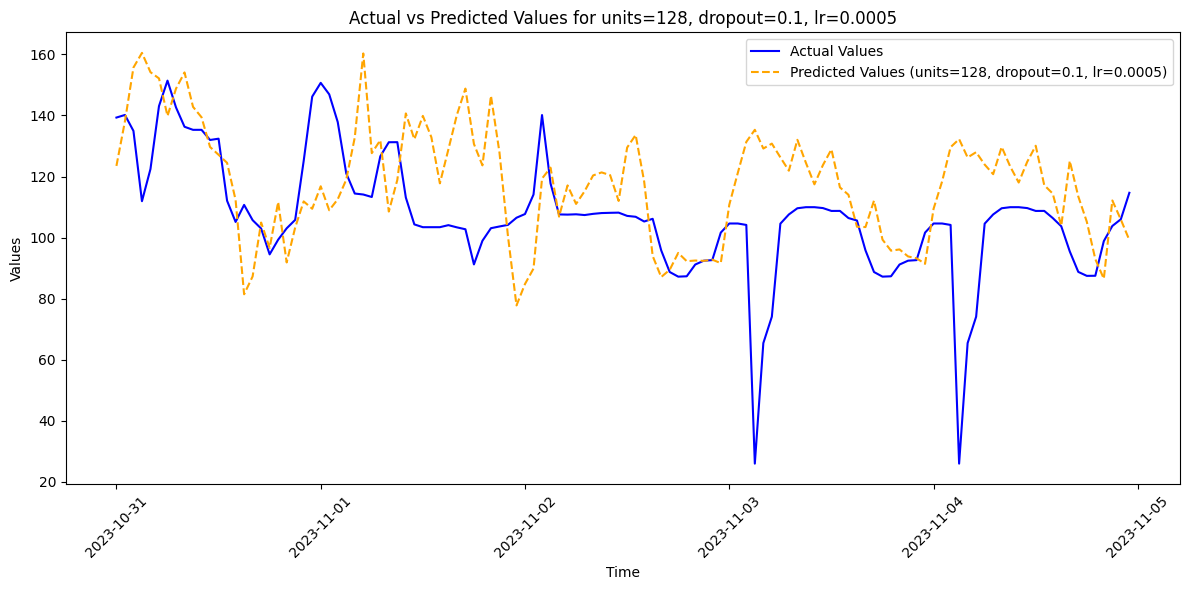

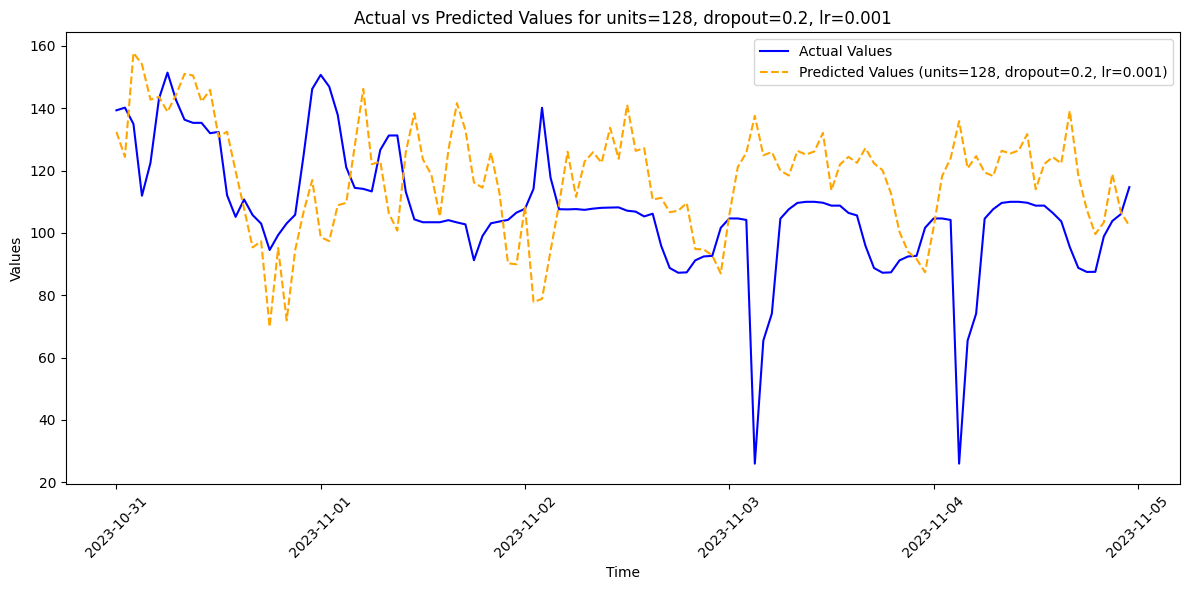

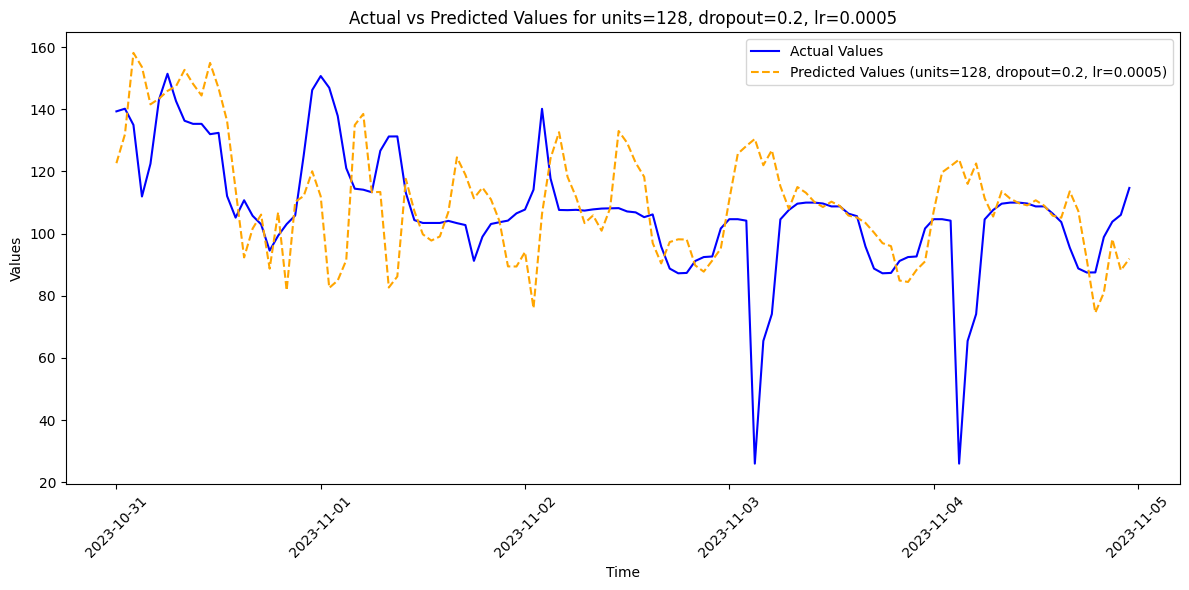

In [28]:
# 개별 하이퍼파라미터 조합에 대해 시각화
for label, predictions in all_results.items():
    plt.figure(figsize=(12, 6))

    # 실제값 플롯
    plt.plot(time_index, actual_values, label="Actual Values", color="blue")

    # 예측값 플롯
    plt.plot(time_index, predictions, label=f"Predicted Values ({label})", color="orange", linestyle="--")

    # 그래프 꾸미기
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title(f"Actual vs Predicted Values for {label}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # 그래프 출력
    plt.show()
